<a href="https://colab.research.google.com/github/omercelik01/Machine-Learning/blob/main/ml_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [5]:
cols = ["fLength" ,"fWidth" ,"fSize","fConc","fConcl","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv('magic04.data',names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [6]:
df["class"] = (df["class"] == "g").astype(int)

In [7]:
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

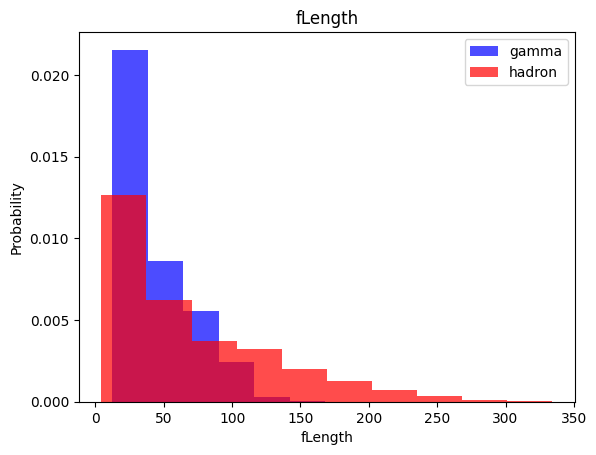

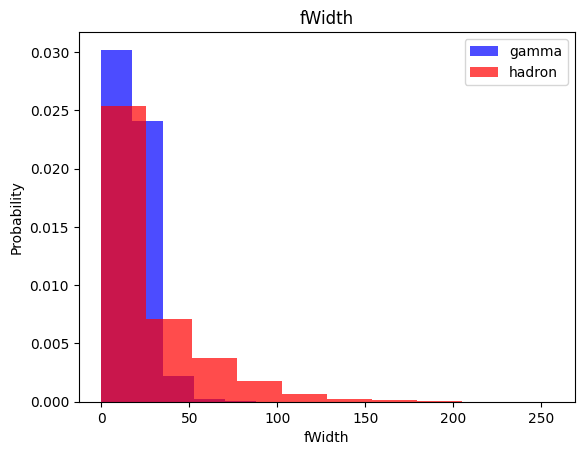

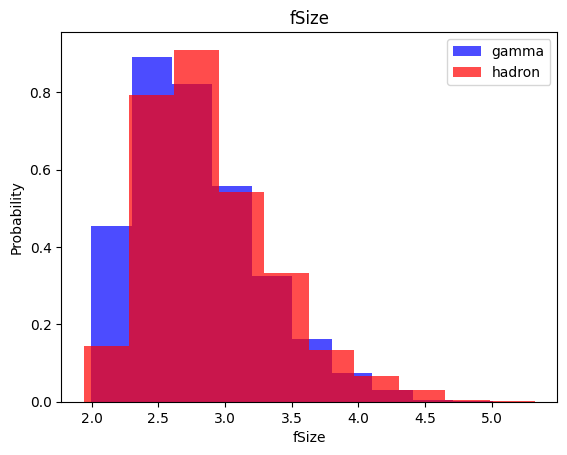

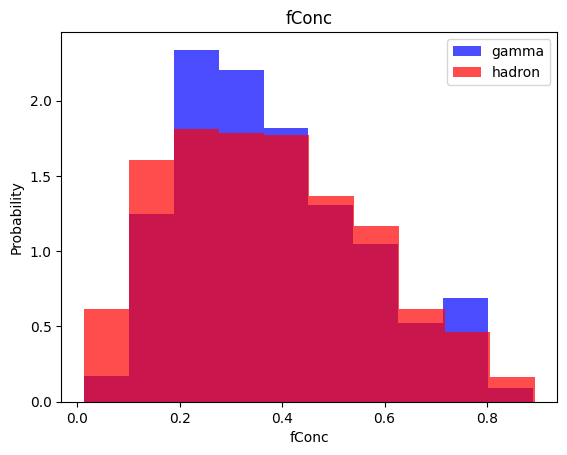

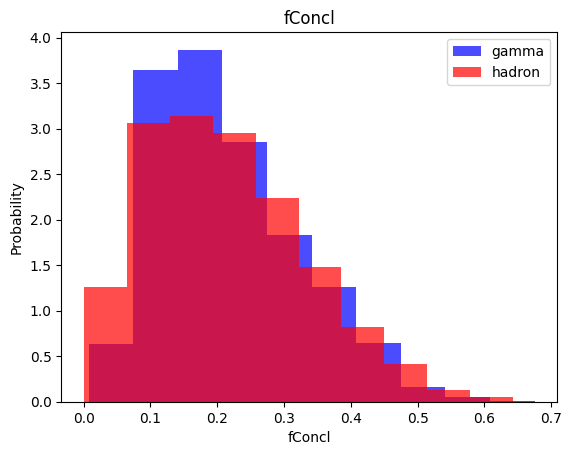

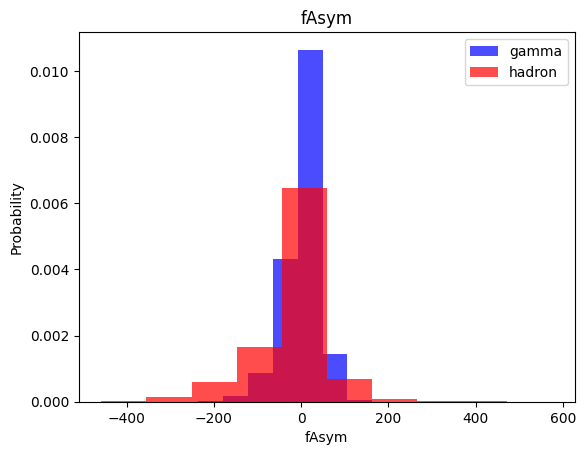

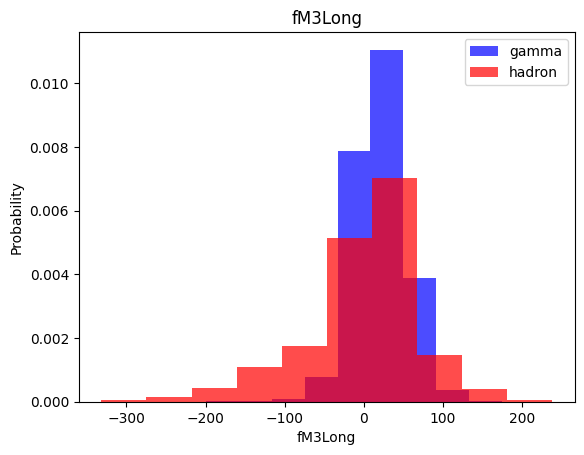

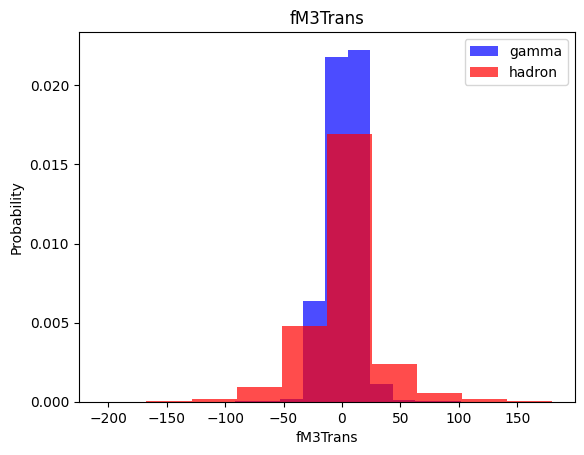

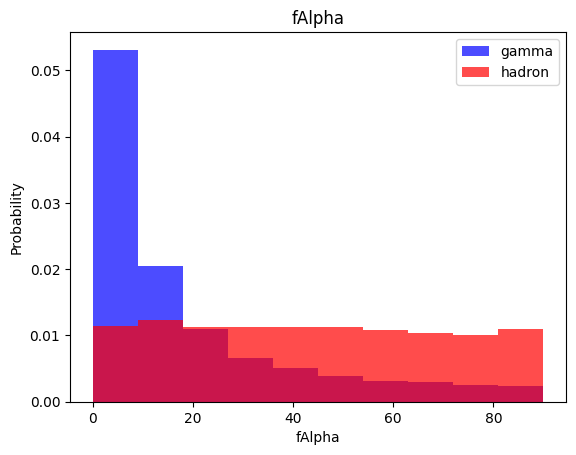

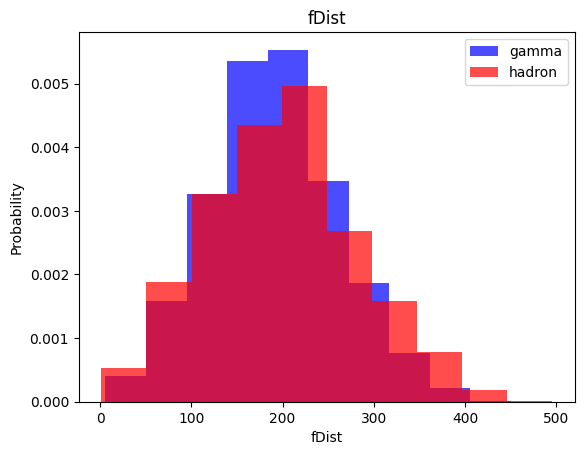

In [8]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color = 'blue',label = 'gamma',alpha = 0.7,density = True)
  plt.hist(df[df["class"]==0][label],color = 'red',label = 'hadron',alpha = 0.7,density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train ,validation ,test datasets


In [9]:
train ,valid ,test = np.split(df.sample(frac = 1),[int(0.6*len(df)),int(0.8*len(df))])

In [10]:
def scale_dataset(dataframe,oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X ,y)




  data = np.hstack((X ,np.reshape(y ,(-1, 1))))

  return data , X ,y

In [11]:
train ,X_train ,y_train = scale_dataset(train,oversample = True)
valid,X_valid ,y_valid = scale_dataset(valid,oversample = False)
test ,X_test ,y_test = scale_dataset(test,oversample = False)

#kNN


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn_model.predict(X_test)

In [15]:
print(classification_report (y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1319
           1       0.86      0.85      0.86      2485

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes


In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train ,y_train)

In [18]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.40      0.49      1319
           1       0.73      0.87      0.79      2485

    accuracy                           0.71      3804
   macro avg       0.68      0.63      0.64      3804
weighted avg       0.69      0.71      0.69      3804



#Log Regression


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train ,y_train)

In [21]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.70      1319
           1       0.85      0.80      0.83      2485

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#SVM


In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [24]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1319
           1       0.89      0.89      0.89      2485

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Net

In [25]:
import tensorflow as tf


In [26]:
def plot_history(history):
  fig,(ax1, ax2) = plt.subplots(1,2 ,figsize = (10 ,4))

  ax1.plot(history.history['loss'],label = 'loss')
  ax2.plot(history.history['val_loss'],label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label = ['accuracy'])
  ax2.plot(history.history['val_accuracy'],label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()






In [28]:
plot_history(history)

NameError: name 'history' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [87]:
def train_model(X_train, y_train ,num_nodes ,dropout_prob ,lr,batch_size ,epochs):
   nn_model = tf.keras.Sequential([
       tf.keras.layers.Dense(num_nodes , activation = 'relu' ,input_shape = (10 ,)),
       tf.keras.layers.Dropout(dropout_prob),
       tf.keras.layers.Dense(32 , activation = 'relu'),
       tf.keras.layers.Dropout(dropout_prob),
       tf.keras.layers.Dense(1 , activation = 'sigmoid')

  ])
   nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001),loss = 'binary_crossentropy',
                 metrics = ['accuracy'])


   history = nn_model.fit(
    X_train ,y_train ,epochs = epochs ,batch_size = batch_size ,validation_split = 0.2 ,verbose = 0)

   return nn_model ,history


16 nodes ,dropout 0 , lr 0.1,batch_size32


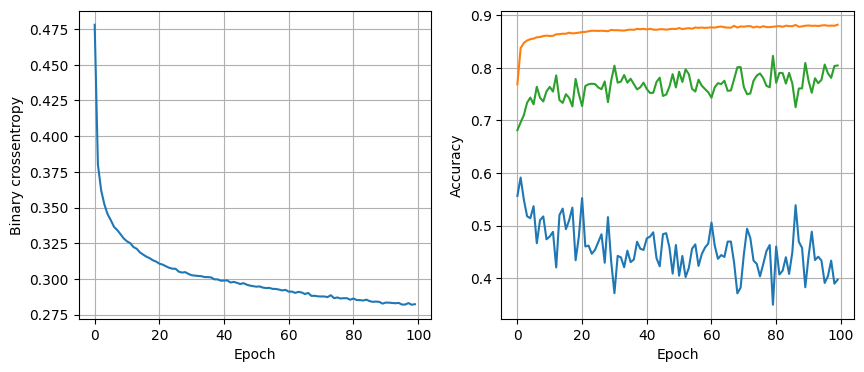

119/119 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8615
16 nodes ,dropout 0 , lr 0.1,batch_size64


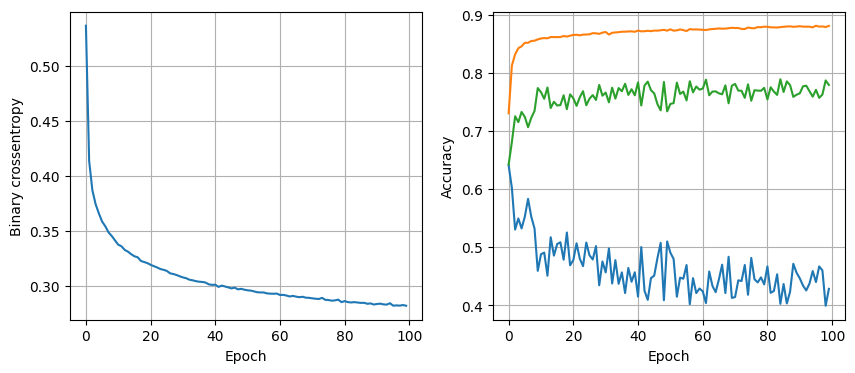

119/119 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8649
16 nodes ,dropout 0 , lr 0.1,batch_size128


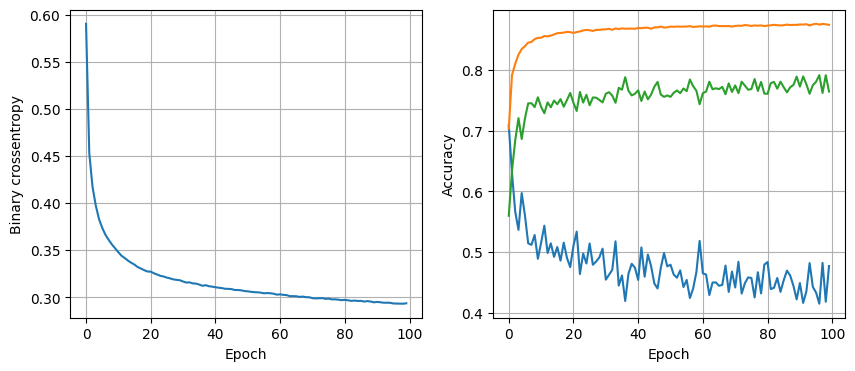

119/119 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.8667
16 nodes ,dropout 0 , lr 0.005,batch_size32


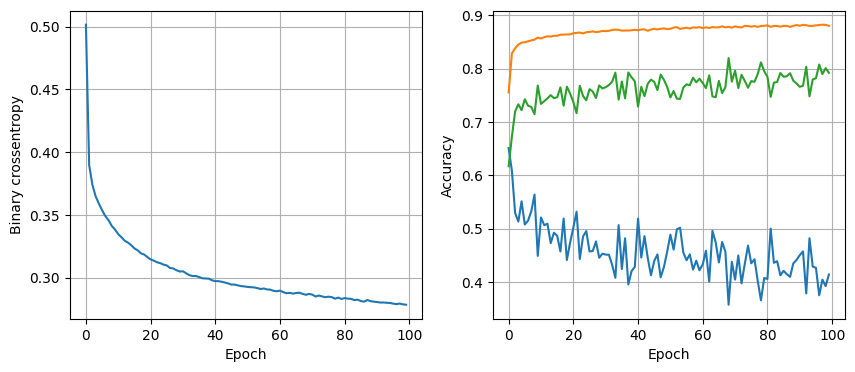

119/119 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8654
16 nodes ,dropout 0 , lr 0.005,batch_size64


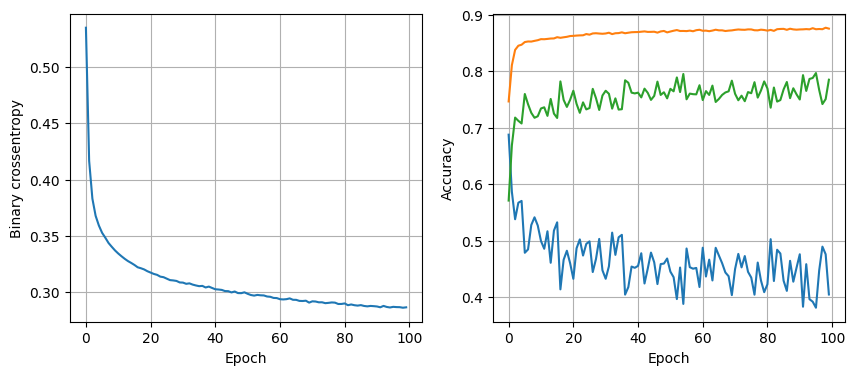

119/119 [==============================] - 0s 3ms/step - loss: 0.3263 - accuracy: 0.8578
16 nodes ,dropout 0 , lr 0.005,batch_size128


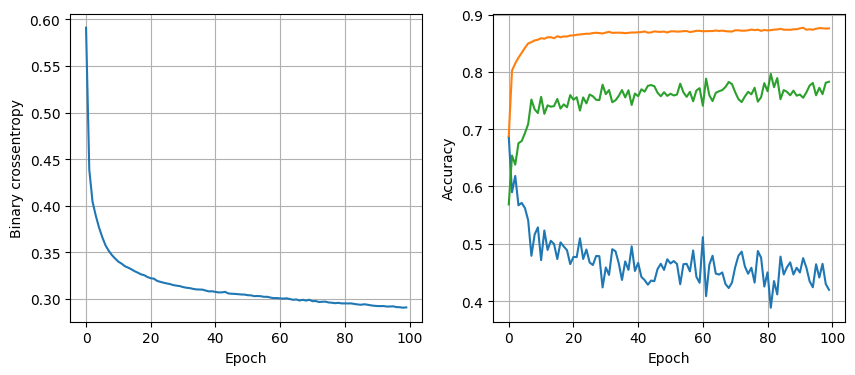

119/119 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.8620
16 nodes ,dropout 0 , lr 0.001,batch_size32


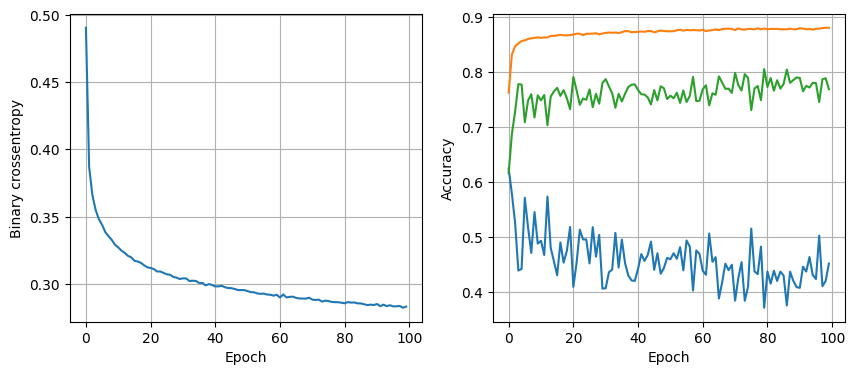

119/119 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.8633
16 nodes ,dropout 0 , lr 0.001,batch_size64


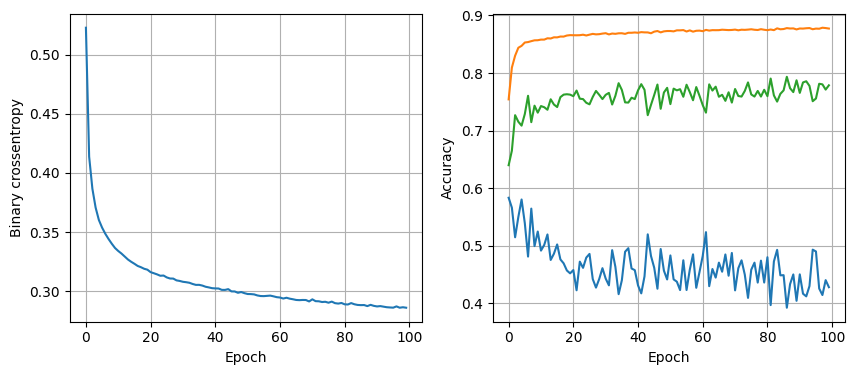

119/119 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8641
16 nodes ,dropout 0 , lr 0.001,batch_size128


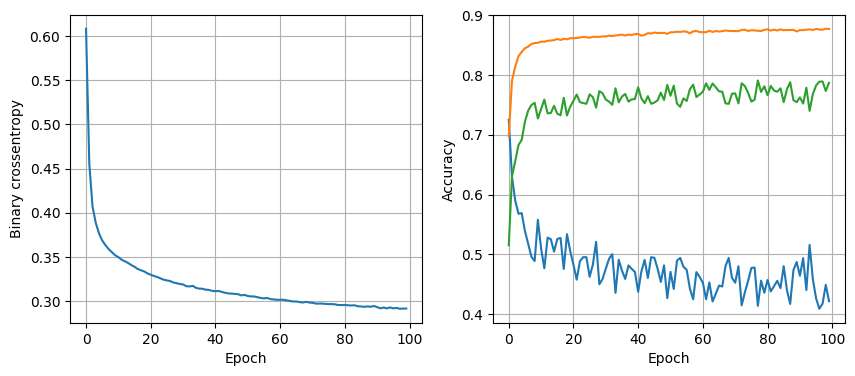

119/119 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8630
16 nodes ,dropout 0.2 , lr 0.1,batch_size32


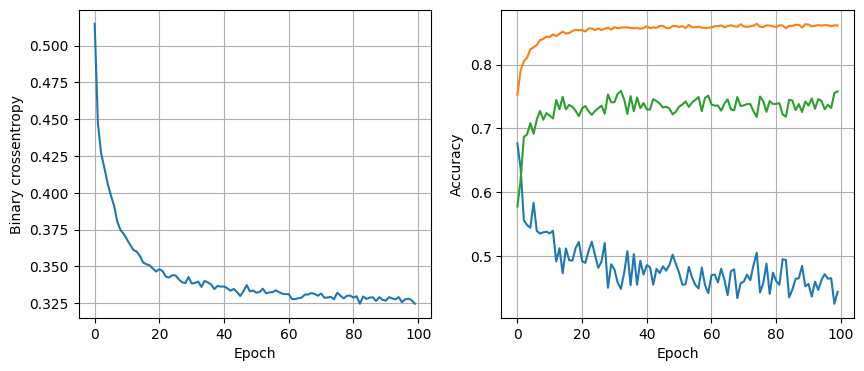

119/119 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8609
16 nodes ,dropout 0.2 , lr 0.1,batch_size64


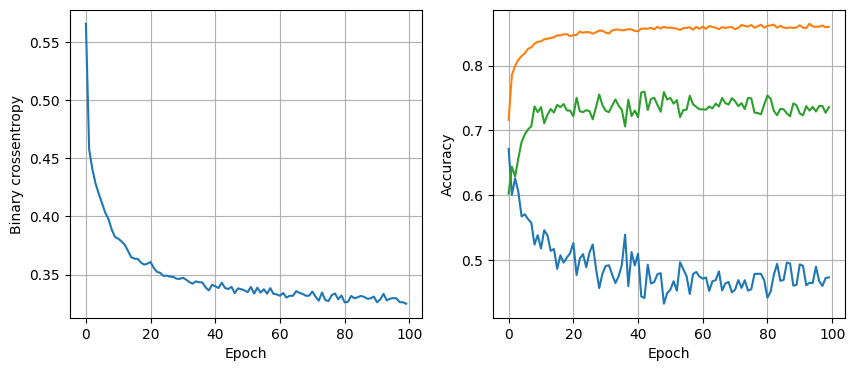

119/119 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8644
16 nodes ,dropout 0.2 , lr 0.1,batch_size128


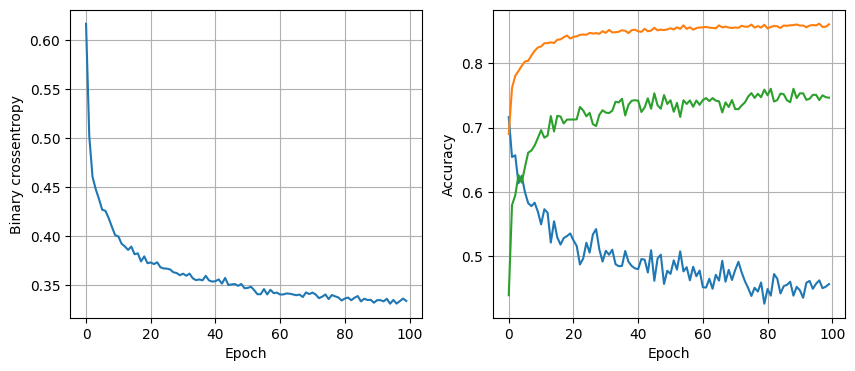

119/119 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8617
16 nodes ,dropout 0.2 , lr 0.005,batch_size32


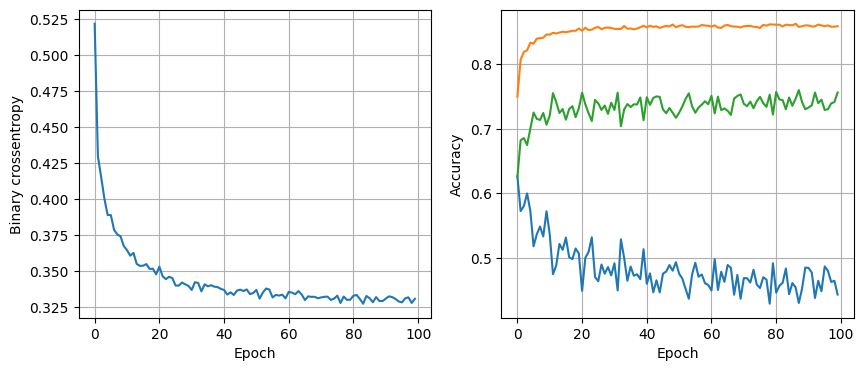

119/119 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8620
16 nodes ,dropout 0.2 , lr 0.005,batch_size64


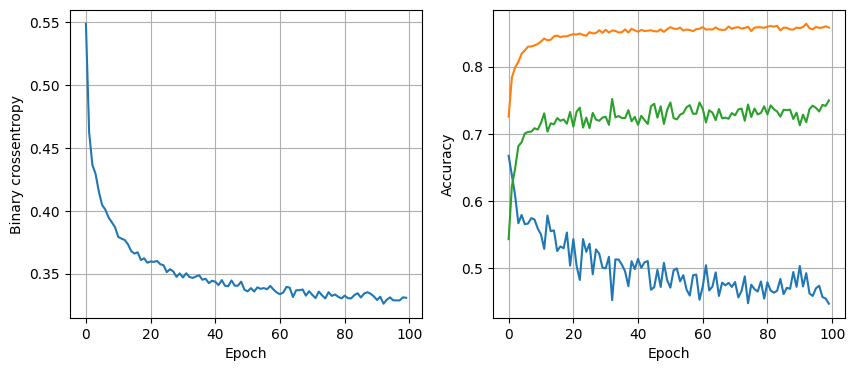

119/119 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8617
16 nodes ,dropout 0.2 , lr 0.005,batch_size128


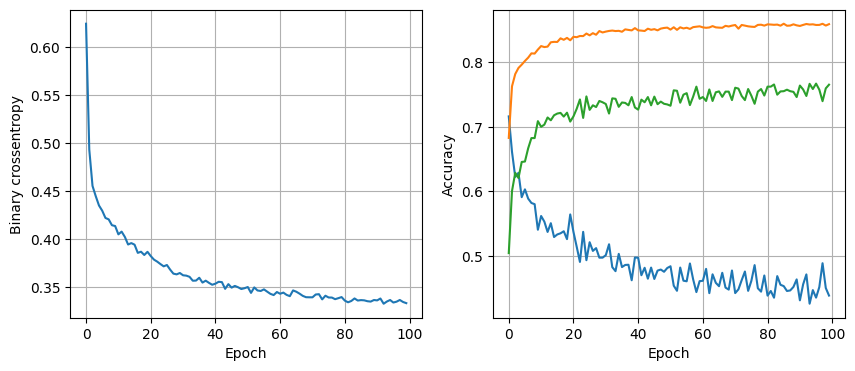

119/119 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8628
16 nodes ,dropout 0.2 , lr 0.001,batch_size32


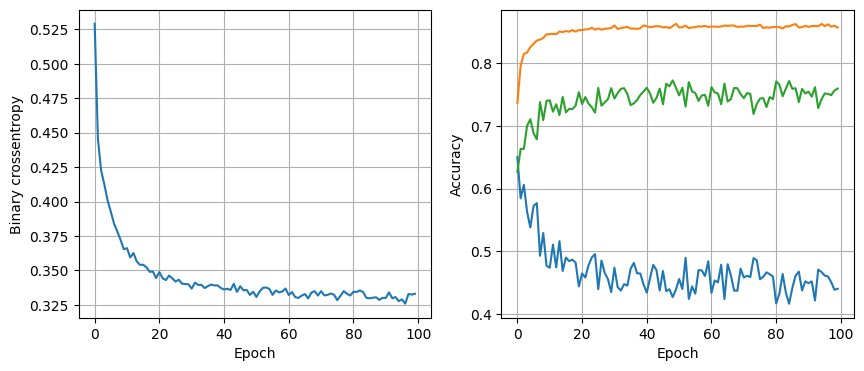

119/119 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8594
16 nodes ,dropout 0.2 , lr 0.001,batch_size64


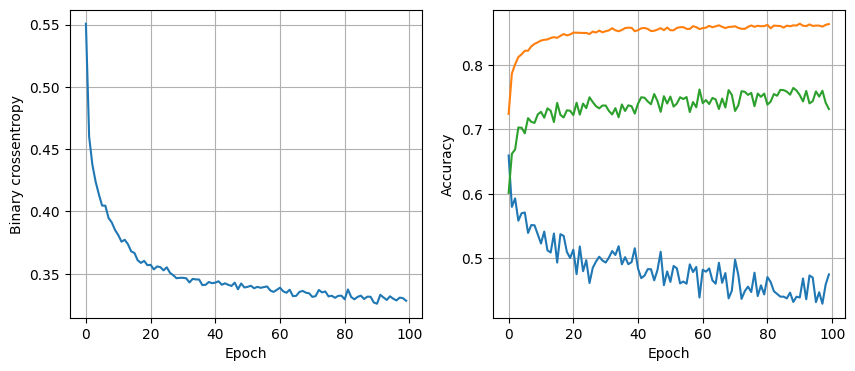

119/119 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8604
16 nodes ,dropout 0.2 , lr 0.001,batch_size128


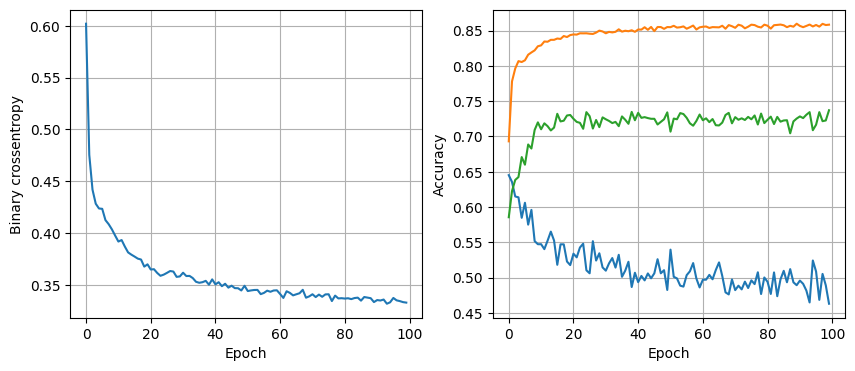

119/119 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8615
32 nodes ,dropout 0 , lr 0.1,batch_size32


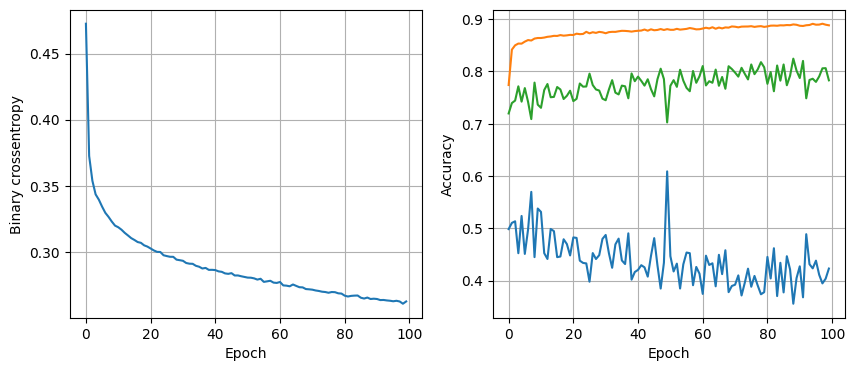

119/119 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8657
32 nodes ,dropout 0 , lr 0.1,batch_size64


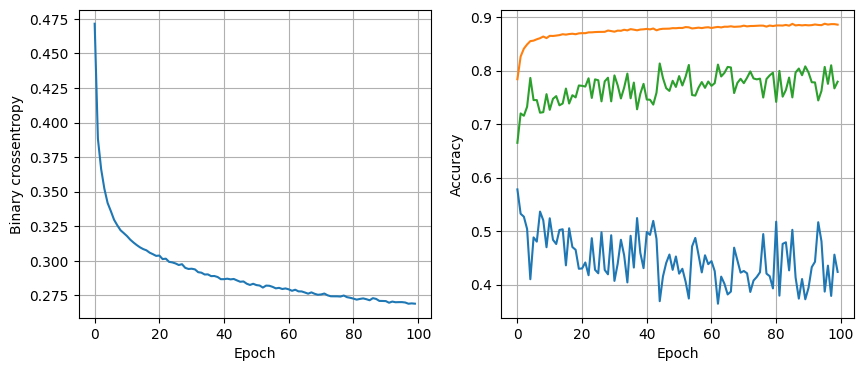

119/119 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.8670
32 nodes ,dropout 0 , lr 0.1,batch_size128


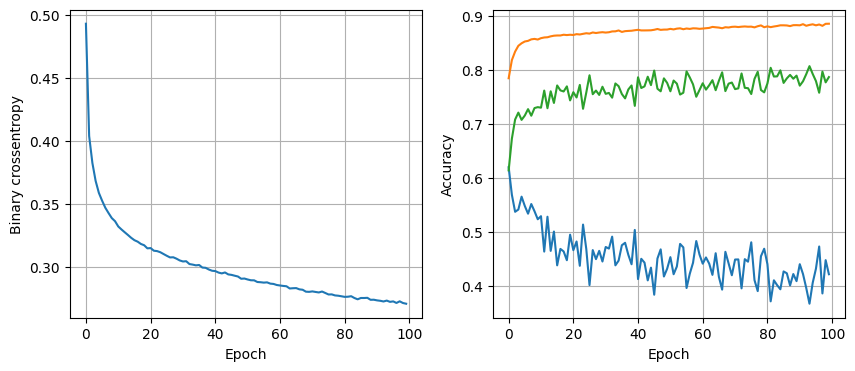

119/119 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8667
32 nodes ,dropout 0 , lr 0.005,batch_size32


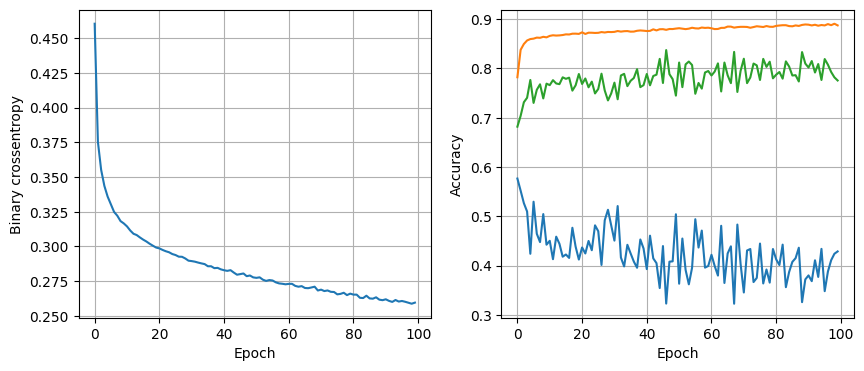

119/119 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8636
32 nodes ,dropout 0 , lr 0.005,batch_size64


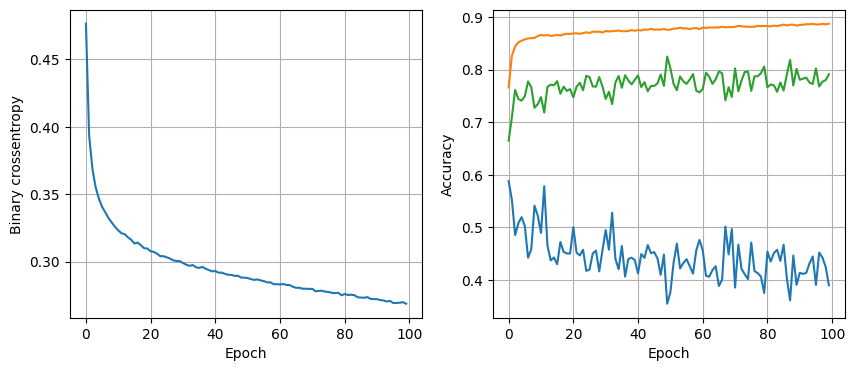

119/119 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8617
32 nodes ,dropout 0 , lr 0.005,batch_size128


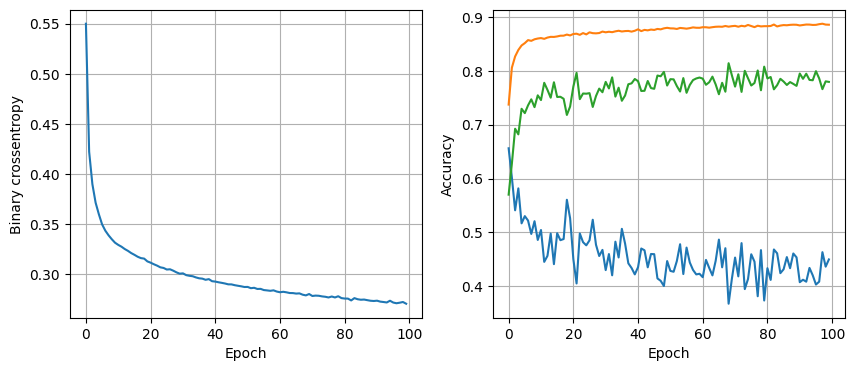

119/119 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8623
32 nodes ,dropout 0 , lr 0.001,batch_size32


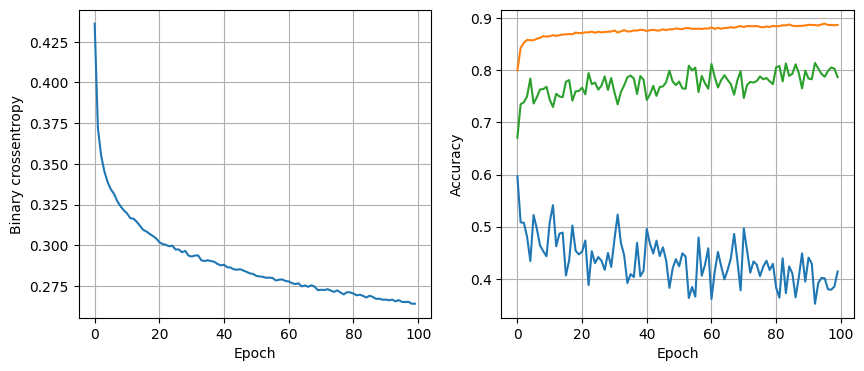

119/119 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8651
32 nodes ,dropout 0 , lr 0.001,batch_size64


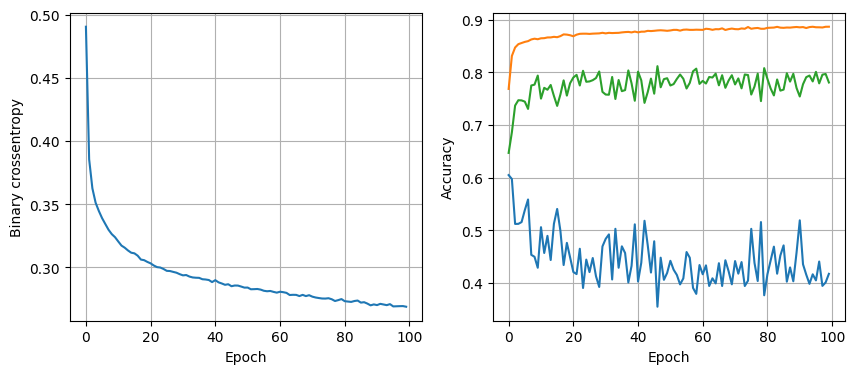

119/119 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8665
32 nodes ,dropout 0 , lr 0.001,batch_size128


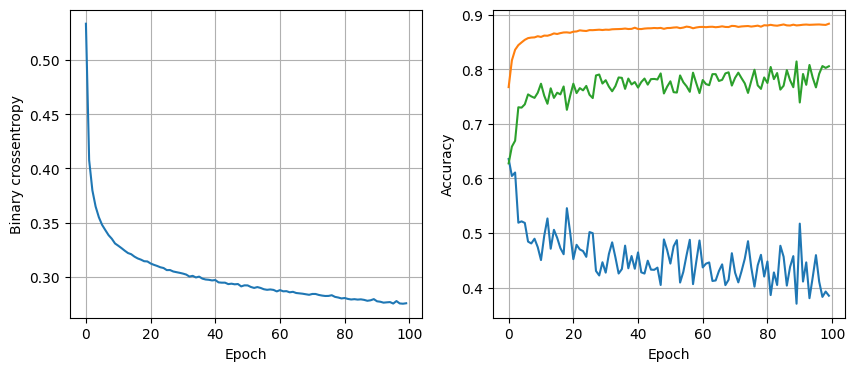

119/119 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8688
32 nodes ,dropout 0.2 , lr 0.1,batch_size32


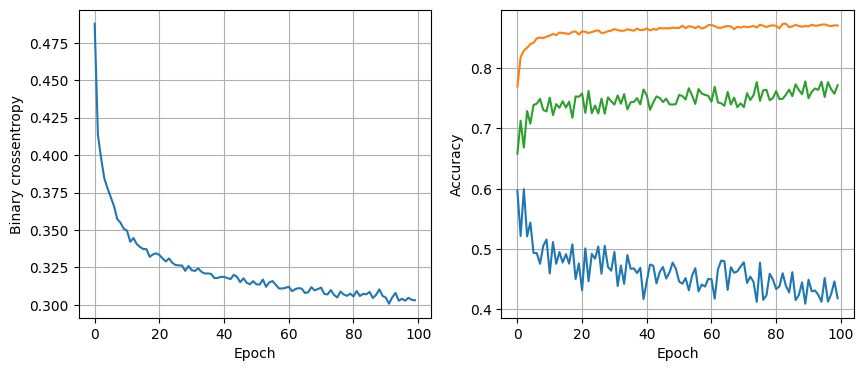

119/119 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8675
32 nodes ,dropout 0.2 , lr 0.1,batch_size64


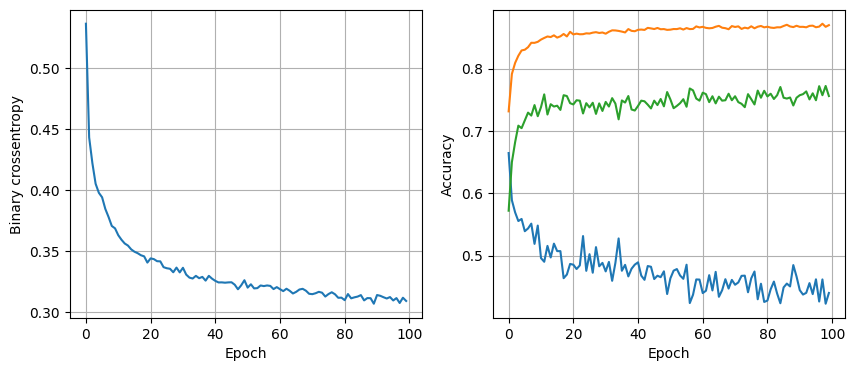

119/119 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8678
32 nodes ,dropout 0.2 , lr 0.1,batch_size128


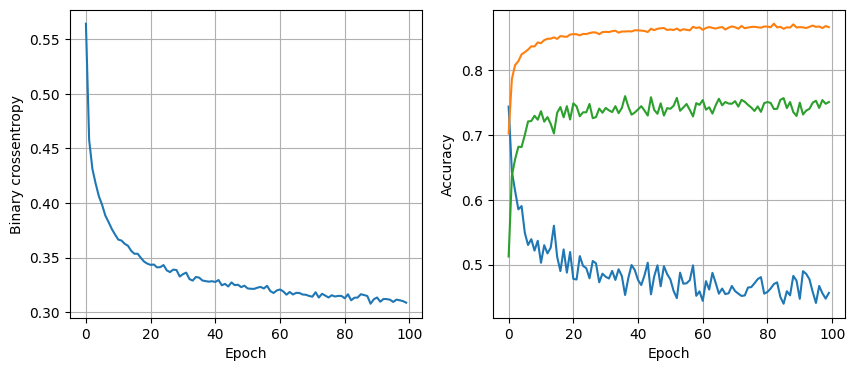

119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8657
32 nodes ,dropout 0.2 , lr 0.005,batch_size32


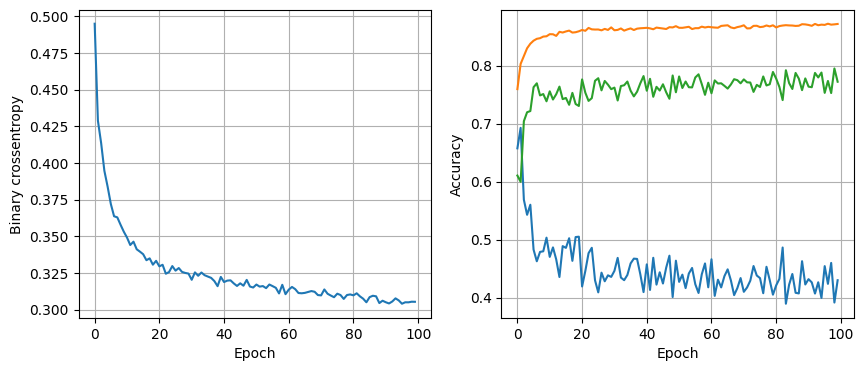

119/119 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8672
32 nodes ,dropout 0.2 , lr 0.005,batch_size64


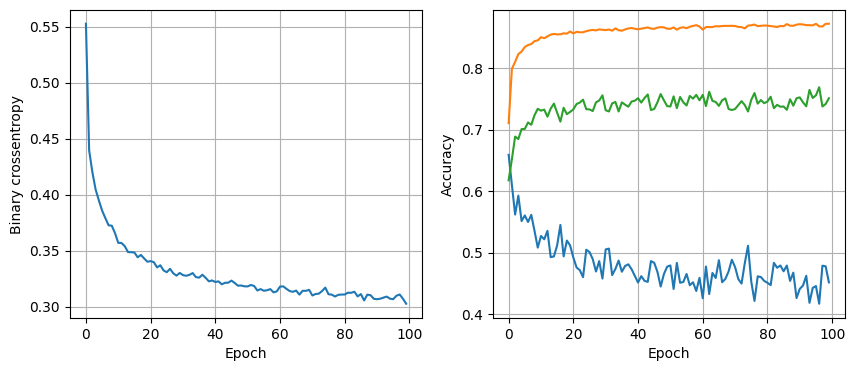

119/119 [==============================] - 0s 2ms/step - loss: 0.3119 - accuracy: 0.8657
32 nodes ,dropout 0.2 , lr 0.005,batch_size128


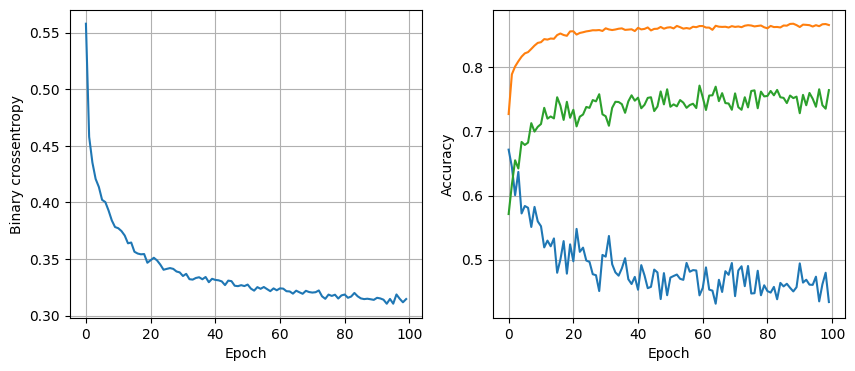

119/119 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8623
32 nodes ,dropout 0.2 , lr 0.001,batch_size32


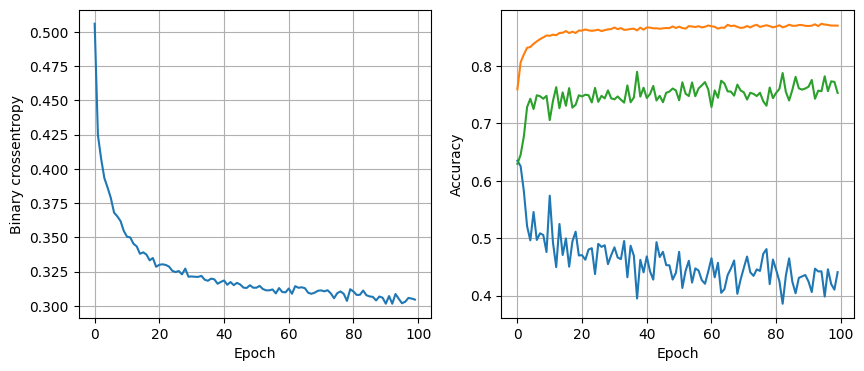

119/119 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8670
32 nodes ,dropout 0.2 , lr 0.001,batch_size64


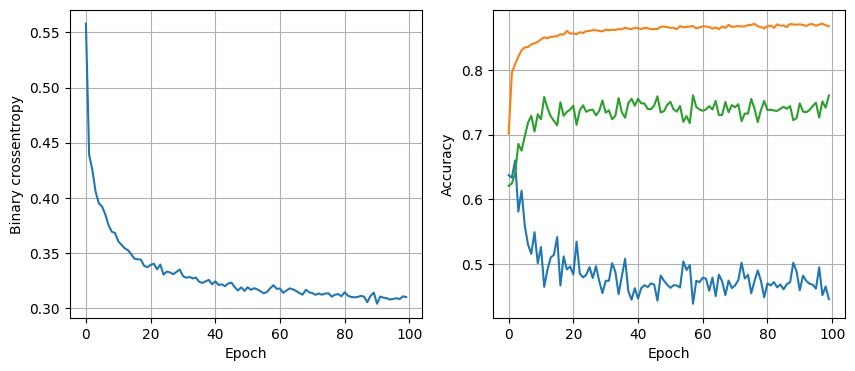

119/119 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8654
32 nodes ,dropout 0.2 , lr 0.001,batch_size128


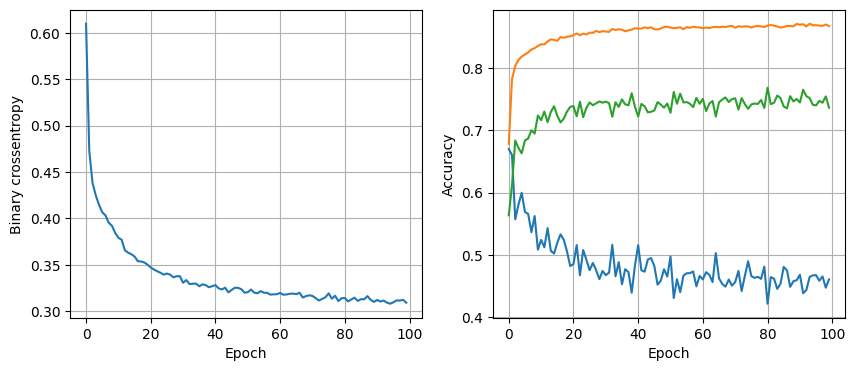

119/119 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8651
64 nodes ,dropout 0 , lr 0.1,batch_size32


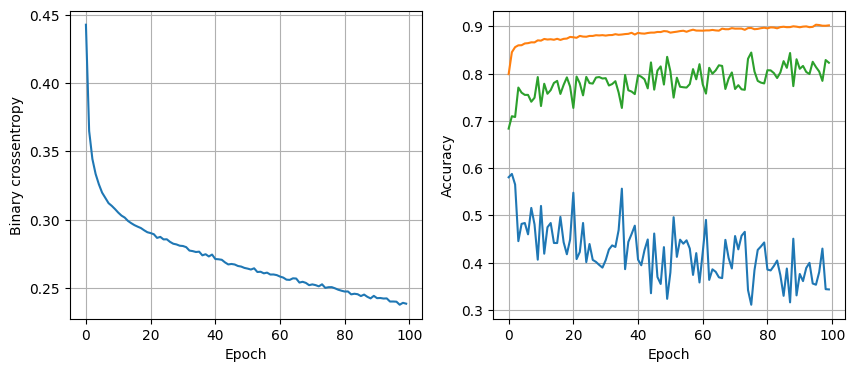

119/119 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8670
64 nodes ,dropout 0 , lr 0.1,batch_size64


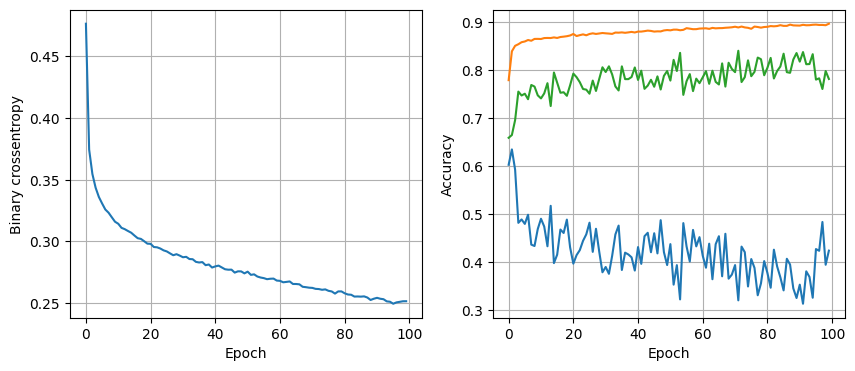

119/119 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8649
64 nodes ,dropout 0 , lr 0.1,batch_size128


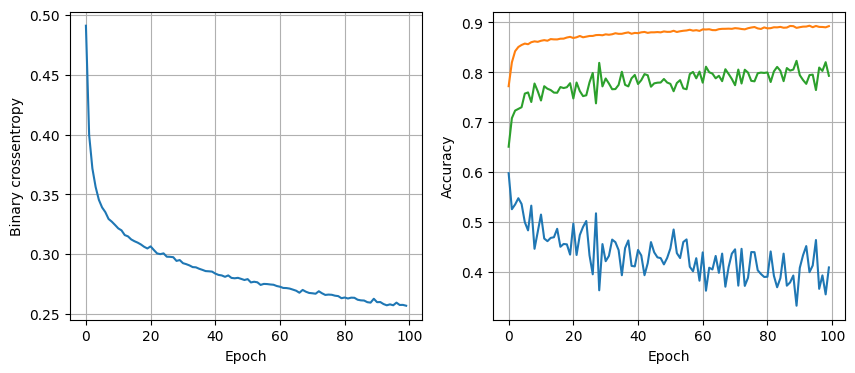

119/119 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8699
64 nodes ,dropout 0 , lr 0.005,batch_size32


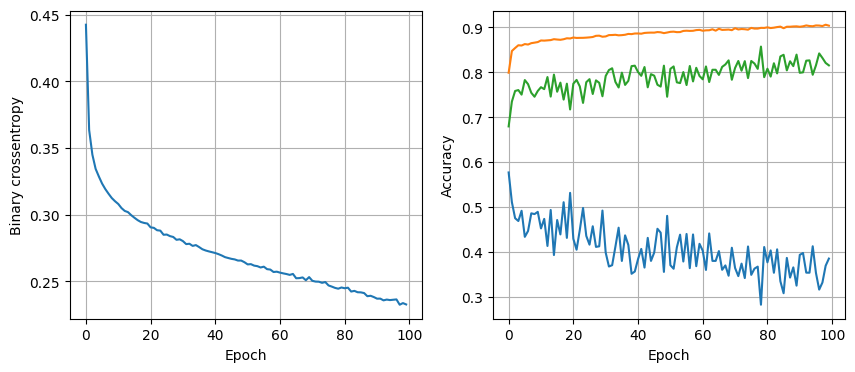

119/119 [==============================] - 0s 3ms/step - loss: 0.3506 - accuracy: 0.8607
64 nodes ,dropout 0 , lr 0.005,batch_size64


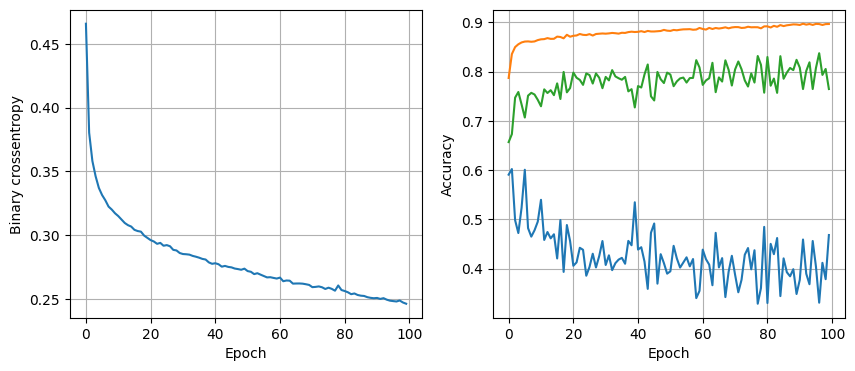

119/119 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.8662
64 nodes ,dropout 0 , lr 0.005,batch_size128


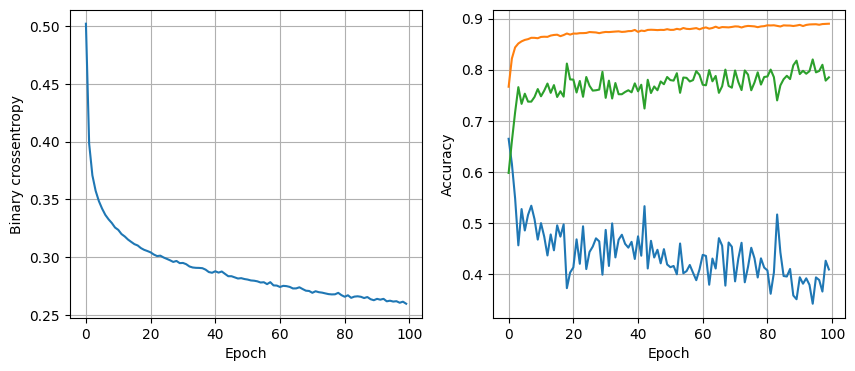

119/119 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8633
64 nodes ,dropout 0 , lr 0.001,batch_size32


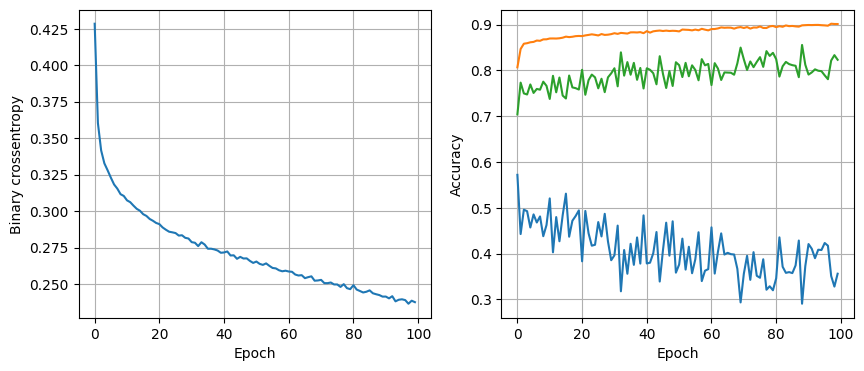

119/119 [==============================] - 0s 3ms/step - loss: 0.3336 - accuracy: 0.8683
64 nodes ,dropout 0 , lr 0.001,batch_size64


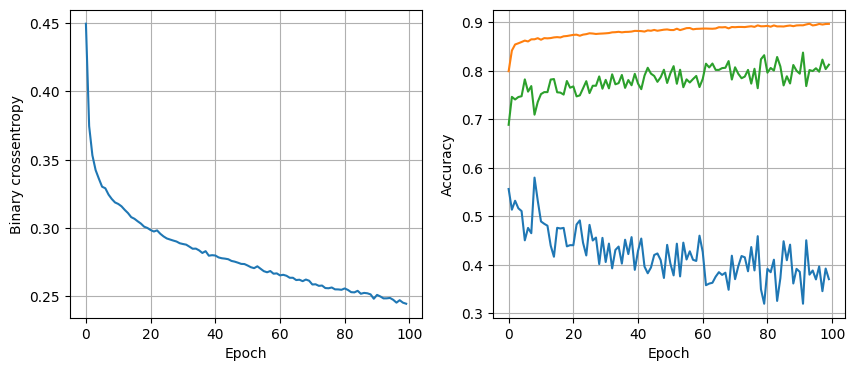

119/119 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8623
64 nodes ,dropout 0 , lr 0.001,batch_size128


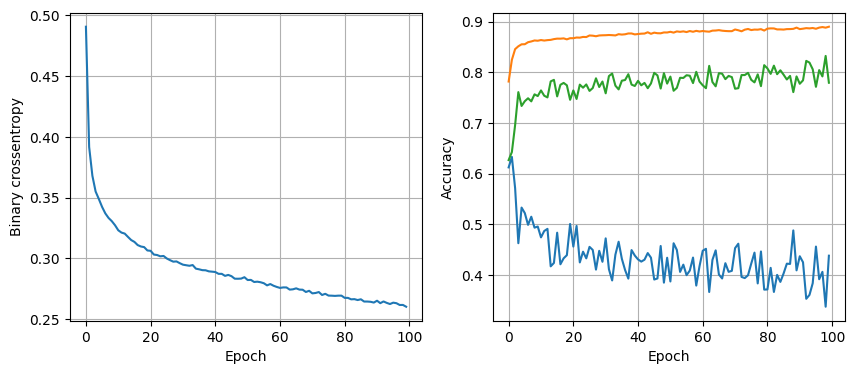

119/119 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8654
64 nodes ,dropout 0.2 , lr 0.1,batch_size32


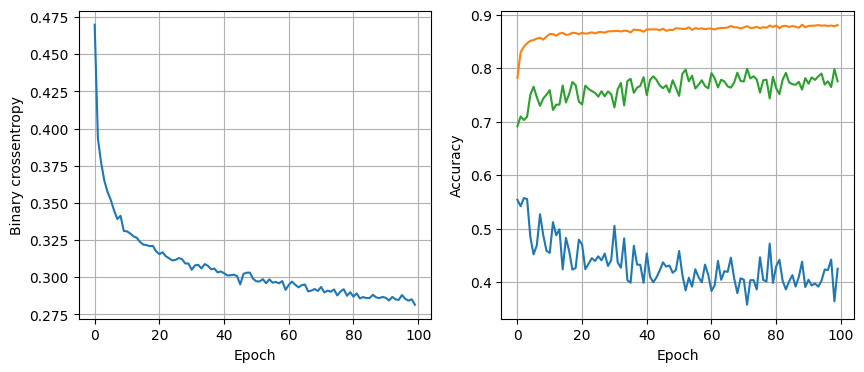

119/119 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8715
64 nodes ,dropout 0.2 , lr 0.1,batch_size64


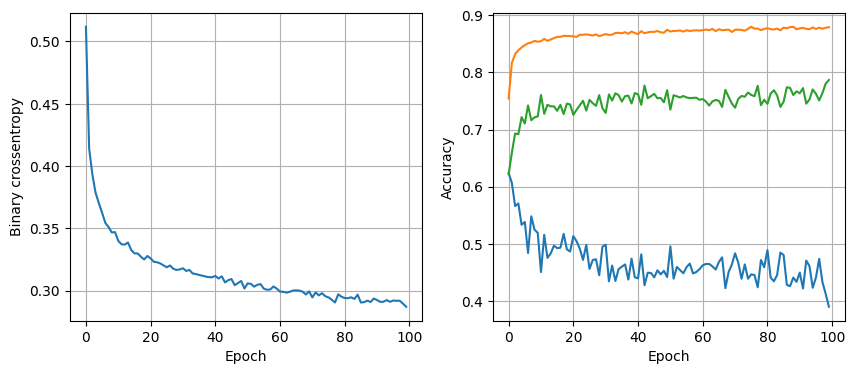

119/119 [==============================] - 0s 3ms/step - loss: 0.3032 - accuracy: 0.8704
64 nodes ,dropout 0.2 , lr 0.1,batch_size128


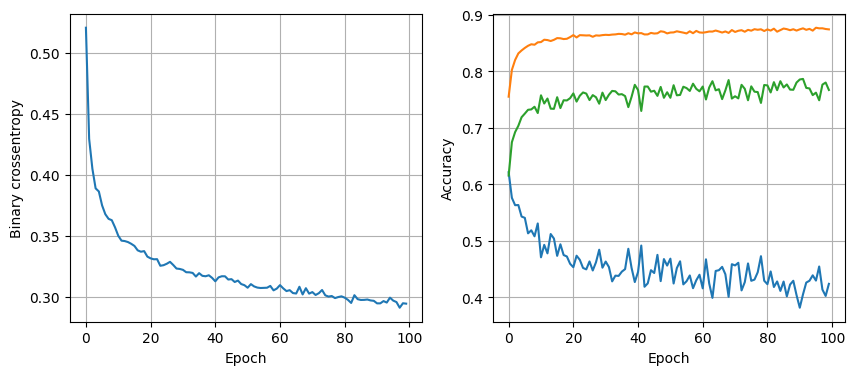

119/119 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8709
64 nodes ,dropout 0.2 , lr 0.005,batch_size32


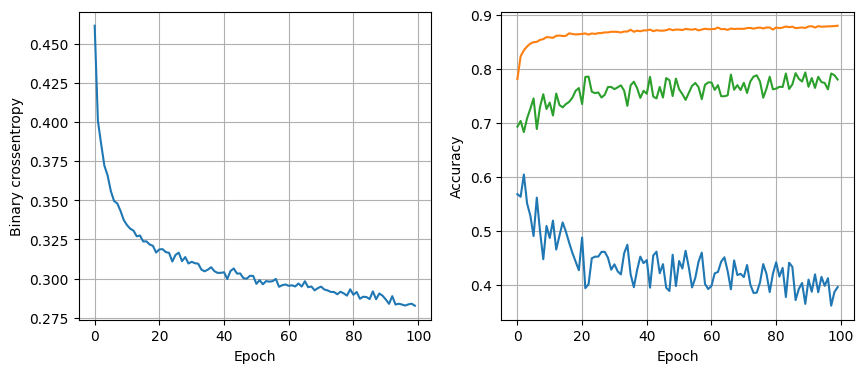

119/119 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8688
64 nodes ,dropout 0.2 , lr 0.005,batch_size64


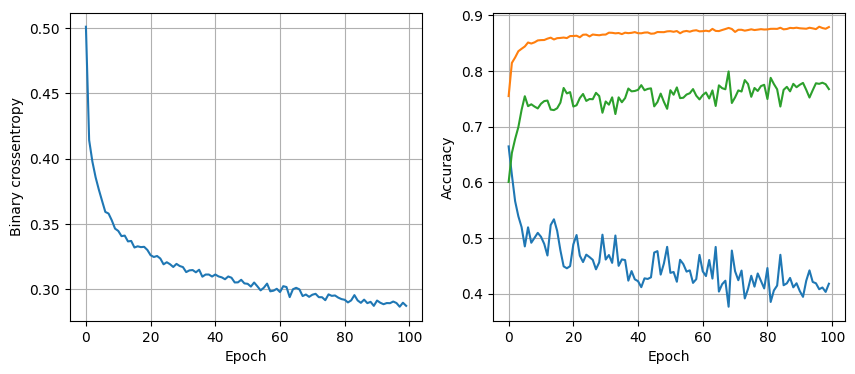

119/119 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8696
64 nodes ,dropout 0.2 , lr 0.005,batch_size128


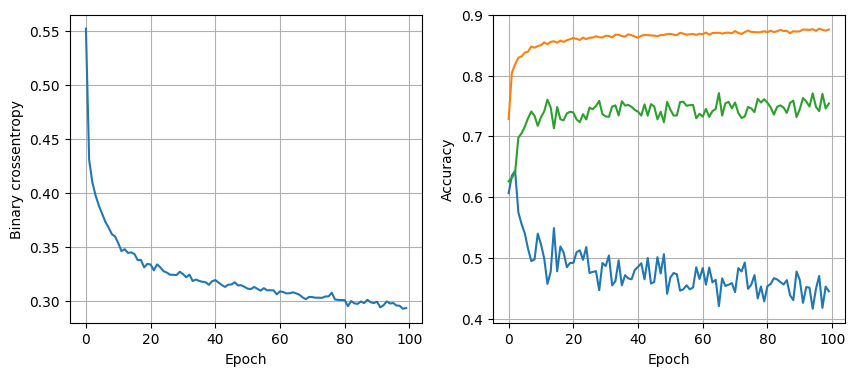

119/119 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8678
64 nodes ,dropout 0.2 , lr 0.001,batch_size32


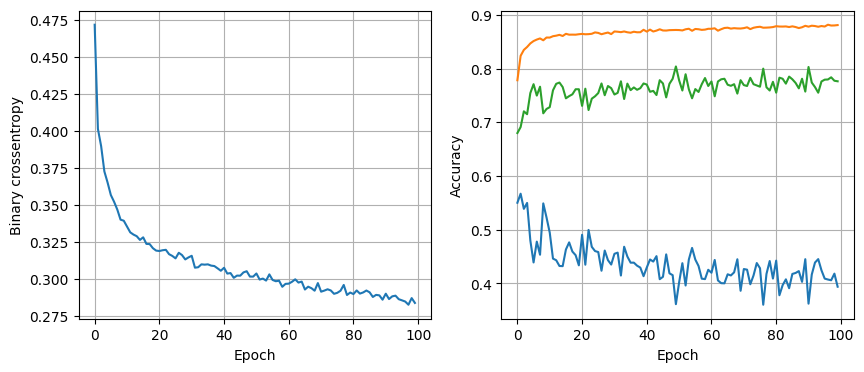

119/119 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8649
64 nodes ,dropout 0.2 , lr 0.001,batch_size64


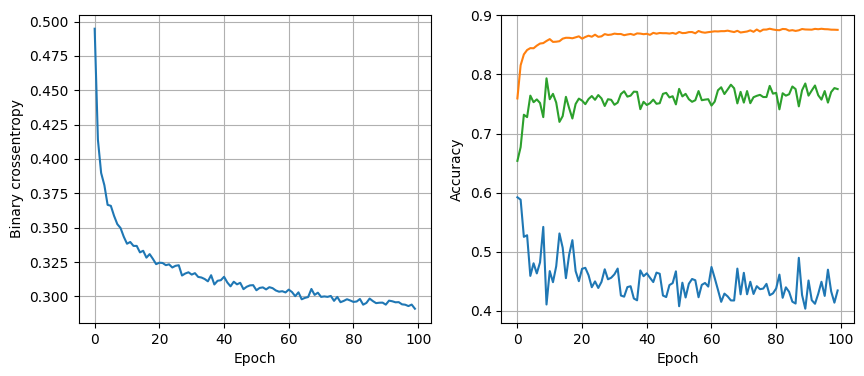

119/119 [==============================] - 0s 3ms/step - loss: 0.3084 - accuracy: 0.8688
64 nodes ,dropout 0.2 , lr 0.001,batch_size128


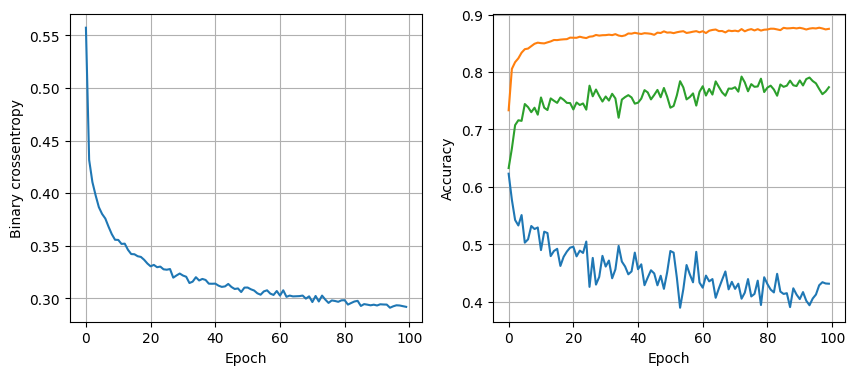

119/119 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8725


In [90]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in[0,0.2]:
    for lr in [0.1 ,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes ,dropout {dropout_prob} , lr {lr},batch_size{batch_size}")
        model ,history = train_model(X_train ,y_train ,num_nodes ,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid ,y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [3]:
least_loss_model.predict(X_test)

NameError: name 'least_loss_model' is not defined